In [11]:
# Importation des bibliothèques pour le traitement des données
import pandas as pd
data=pd.read_csv("/content/Dataset.csv")
data

,ID,content,score
0,2228,"pouffe sympa et pas encombrante, belle couleur...",0
1,3840,Le panceau très petite,0
2,4174,Bon produit,-1
3,1729,La brosse a dents est de tres mauvaise qualité...,-1
4,199,Très loin des autres marques.,-1
...,...,...,...
18439,121216,Jadore Je la recommande vivement.,1
18440,120814,تلتةخ,1
18441,19543,arnaque et publicité mensongère,-1
18442,136582,Application Primitif,-1


In [14]:
# Compter le nombre d'occurrences de chaque valeur dans la colonne 'score'
counts = data['score'].value_counts()

# Afficher les résultats
print(counts)

score
 1    7000
-1    6501
 0    4943
Name: count, dtype: int64


In [15]:
# pandas : bibliothèque pour la manipulation des données sous forme de DataFrames
import pandas as pd

# numpy : bibliothèque pour les calculs numériques, notamment les matrices et les tableaux
import numpy as np

# seaborn : bibliothèque de visualisation des données qui se base sur matplotlib, pour des visualisations statistiques avancées
import seaborn as sns

# matplotlib.pyplot : bibliothèque pour la création de graphiques et visualisations, utilisée ici pour afficher les matrices de confusion
import matplotlib.pyplot as plt

# WordCloud : bibliothèque pour générer des nuages de mots à partir de textes
from wordcloud import WordCloud

# CountVectorizer : module de scikit-learn pour la vectorisation de texte, transforme des textes en matrices de caractéristiques
from sklearn.feature_extraction.text import CountVectorizer

# train_test_split : fonction pour diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

# MultinomialNB : modèle de classification Naive Bayes pour les données de type texte (multi-classe)
from sklearn.naive_bayes import MultinomialNB

# LabelEncoder : classe pour encoder des étiquettes catégorielles en valeurs numériques (utile pour les classes)
from sklearn.preprocessing import LabelEncoder

# classification_report : fonction pour générer un rapport de classification incluant précision, rappel et F1-score
from sklearn.metrics import classification_report

# accuracy_score : fonction pour évaluer la précision d'un modèle en comparant les prédictions aux vraies valeurs
from sklearn.metrics import accuracy_score

# confusion_matrix : fonction pour calculer la matrice de confusion qui permet d'évaluer les performances du modèle
from sklearn.metrics import confusion_matrix

# warnings : module pour filtrer les avertissements, utile pour masquer des messages inutiles
import warnings
warnings.filterwarnings('ignore')  # Cette ligne ignore les avertissements pour rendre le code plus propre à l'exécution

# PIL (Pillow) : bibliothèque pour ouvrir, manipuler et sauvegarder des images (utile pour les nuages de mots, par exemple)
from PIL import Image


In [16]:
# Check for missing values
has_missing_values = data.isnull().any().any()

if has_missing_values:
    print("Missing values found in the dataset.")
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18444 entries, 0 to 18443
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       18444 non-null  int64 
 1   content  18444 non-null  object
 2   score    18444 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 432.4+ KB


<Axes: xlabel='score', ylabel='count'>

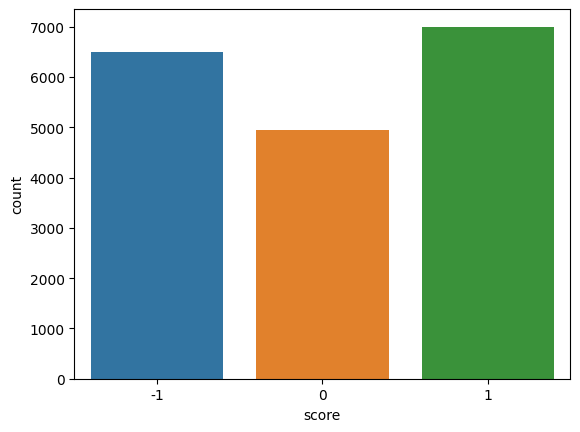

In [18]:
sns.countplot(data=data, x="score", hue="score", palette=["#1f77b4", "#ff7f0e", "#2ca02c"], dodge=False, legend=False)


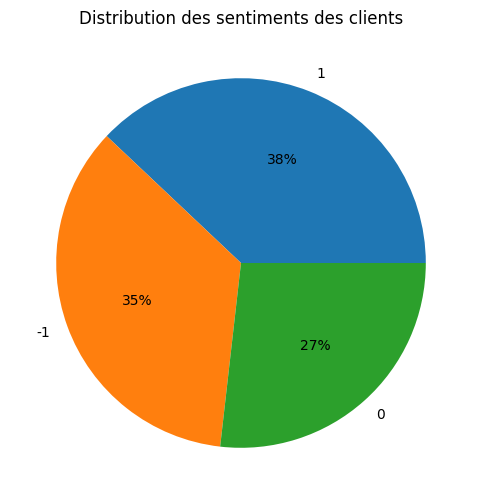

In [19]:
data['score'].value_counts().plot.pie(
    autopct="%0.0f%%",
    figsize=(6, 6),  # Ajuste la taille du graphique
    title="Distribution des sentiments des clients",
    ylabel=""  # Supprime l'étiquette par défaut de l'axe Y
);

In [20]:
def clean_text(text):
    if isinstance(text, str):  # Vérifie si la donnée est bien une chaîne de caractères
        text = re.sub(r'[^\w\s]', '', text)  # Supprime la ponctuation
        text = re.sub(r'\d+', '', text)       # Supprime les nombres
        return text.lower()                   # Convertit en minuscules
    return text

In [21]:
# Appliquer la fonction sur la colonne 'Text'
import re
data['content'] = data['content'].apply(clean_text)

lemmatisation : réduction des mots à leur forme canonique

tokenisation :division du texte en unités, ici des mots

In [22]:
# Importation de la classe WordNetLemmatizer pour la lemmatisation
from nltk.stem import WordNetLemmatizer

# Importation du module nltk
import nltk

# Téléchargement du corpus WordNet requis pour la lemmatisation
nltk.download('wordnet')

# Initialisation de l'outil de lemmatisation
lemmatizer = WordNetLemmatizer()

# Initialisation d'un tokenizer basé sur les espaces blancs
word_tokenizer = nltk.tokenize.WhitespaceTokenizer()


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [23]:
def lemmatize_text(text):
    # Tokenisation du texte en mots, puis application de la lemmatisation sur chaque mot en considérant chaque mot comme un verbe.
    return [lemmatizer.lemmatize(w, "v")  # Lemmatisation pour chaque mot
            for w in word_tokenizer.tokenize(text)]  # Tokenisation du texte


In [24]:
data.content = data.content.apply(lambda x:' '.join(lemmatize_text(x)))

In [25]:
# Afficher la ligne 600 (index 599) après lemmatisation, avec le texte tokenisé et lemmatisé
# Afficher à la fois le texte original et le texte lemmatisé
print("Texte original :")
print(data.iloc[600]['content'])  # Affiche le texte original
# Si vous souhaitez également afficher les tokens lemmatisés sous forme de liste, vous pouvez faire cela :
lemmatized_tokens = lemmatize_text(data.iloc[600]['content'])
print("\nTokens lemmatisés :")
print(lemmatized_tokens)  # Affiche les tokens lemmatisés sous forme de liste


Texte original :
je suis vraiment très dessus sur la qualité des panneaux fournir ce sont des callot désolé mais je ne suis pas satisfaits de tout

Tokens lemmatisés :
['je', 'suis', 'vraiment', 'très', 'dessus', 'sur', 'la', 'qualité', 'des', 'panneaux', 'fournir', 'ce', 'sont', 'des', 'callot', 'désolé', 'mais', 'je', 'ne', 'suis', 'pas', 'satisfaits', 'de', 'tout']


In [26]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# Essayer de télécharger les ressources
try:
    nltk.download('stopwords')
    nltk.download('punkt_tab')
    nltk.download('punkt')
except Exception as e:
    print("Erreur lors du téléchargement des ressources nltk:", e)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [27]:
# Fonction pour supprimer les stopwords
# Charger les stopwords en français
stop_words = set(stopwords.words('french'))
def remove_stopwords(text):
    # Tokeniser le texte en mots
    words = word_tokenize(text)
    # Garder les mots qui ne sont pas dans la liste des stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Rejoindre les mots filtrés pour reformer le texte
    return ' '.join(filtered_words)


# Appliquer la fonction à la colonne 'content'
data['content'] = data['content'].apply(remove_stopwords)



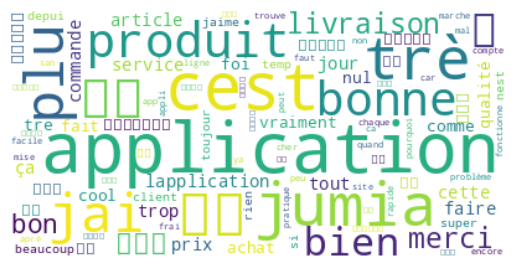

In [28]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Joindre tous les textes de la colonne 'content' en une seule chaîne
content = " ".join(data['content'].dropna())  # Assurer que les valeurs NaN sont supprimées

# Créer le WordCloud
cloud = WordCloud(stopwords=stopwords,  # Exclure les mots vides
                  background_color="white",  # Couleur de fond
                  collocations=False,  # Désactiver les combinaisons fréquentes de mots
                  max_words=100)  # Limiter à 100 mots

# Générer le WordCloud à partir du contenu
cloud.generate(content)


plt.imshow(cloud, interpolation='bilinear')  # IM = IMAGE
plt.axis("off")  # NO AXIS
plt.show()  # DISPLAY PLOT


In [29]:
from sklearn.model_selection import train_test_split

# Remplacer 'data2' par le nom de ton DataFrame, ici 'data'
X = data['content']  # Utilise 'data' au lieu de 'data2'
y = data['score']   # Utilise 'data' au lieu de 'data2'

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher la forme des ensembles pour vérifier la division
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (14755,)
X_test shape: (3689,)
y_train shape: (14755,)
y_test shape: (3689,)


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Charger les stopwords en français depuis NLTK
stop_words = stopwords.words('french')

# Utiliser TfidfVectorizer avec n-grams (unigrams, bigrams et trigrams)
vectorizer = TfidfVectorizer(ngram_range=(1, 3), stop_words=stop_words)

# Appliquer le vectorizer aux données d'entraînement
X_train = vectorizer.fit_transform(X_train)

# Transformer les données de test en utilisant le même vectorizer
X_test = vectorizer.transform(X_test)


Naive Bayes

In [31]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
model_nb = MultinomialNB(alpha=0)  # Laplace smoothing (alpha) = 0
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

In [32]:
# Évaluation pour Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb}')
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.5673624288425048
              precision    recall  f1-score   support

          -1       0.53      0.77      0.63      1323
           0       0.49      0.25      0.33       992
           1       0.66      0.61      0.63      1374

    accuracy                           0.57      3689
   macro avg       0.56      0.54      0.53      3689
weighted avg       0.57      0.57      0.55      3689



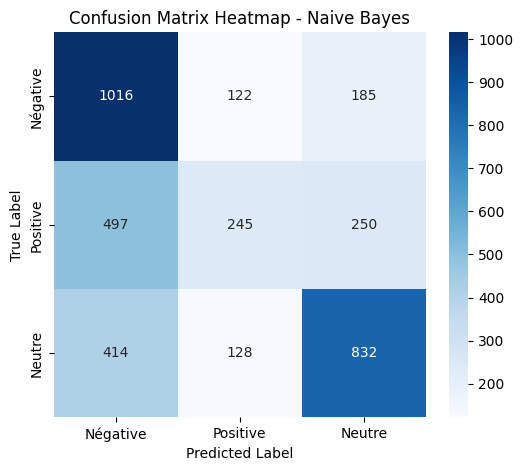

In [33]:
# Matrice de confusion Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Négative", "Positive", "Neutre"],
            yticklabels=["Négative", "Positive", "Neutre"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap - Naive Bayes")
plt.show()

Random forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest - RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

In [35]:
# Évaluation pour Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.605855245323936
              precision    recall  f1-score   support

          -1       0.71      0.60      0.65      1323
           0       0.51      0.31      0.39       992
           1       0.58      0.83      0.68      1374

    accuracy                           0.61      3689
   macro avg       0.60      0.58      0.57      3689
weighted avg       0.61      0.61      0.59      3689



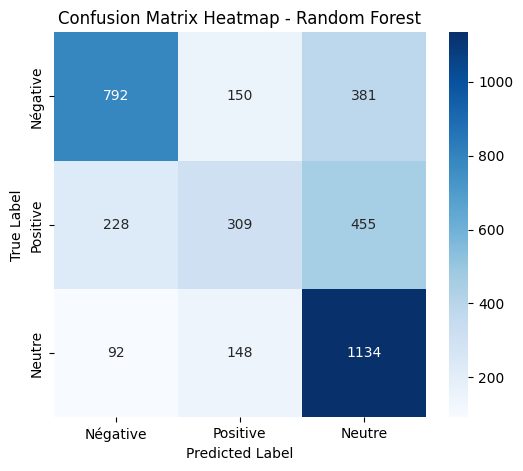

In [36]:
# Matrice de confusion Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Négative", "Positive", "Neutre"],
            yticklabels=["Négative", "Positive", "Neutre"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap - Random Forest")
plt.show()

SVM

In [37]:
# Support Vector Machine - SVM (SVC)
from sklearn.svm import SVC  # Importer le SVM
# Initialisation du modèle SVM avec un noyau linéaire et activation des probabilités
model_svm = SVC(kernel='linear', random_state=42, probability=True)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

In [38]:
# Évaluation pour SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm}')
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.6562754133911629
              precision    recall  f1-score   support

          -1       0.70      0.72      0.71      1323
           0       0.54      0.42      0.47       992
           1       0.67      0.77      0.72      1374

    accuracy                           0.66      3689
   macro avg       0.64      0.63      0.63      3689
weighted avg       0.65      0.66      0.65      3689



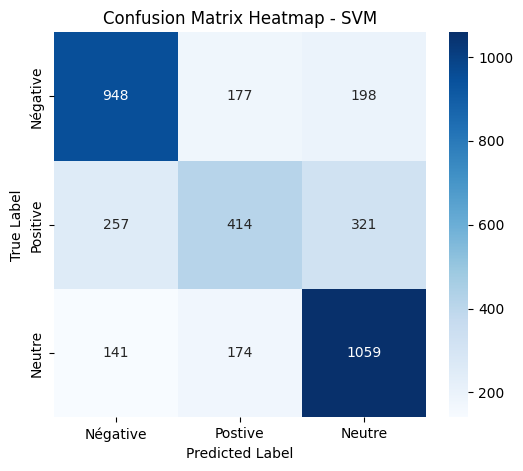

In [39]:
# Matrice de confusion SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Négative", "Postive", "Neutre"],
            yticklabels=["Négative", "Positive", "Neutre"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap - SVM")
plt.show()

In [40]:
# Entrer une nouvelle phrase à tester
new_input = input("Entrez une phrase pour tester le modèle SVM : ")

# Vectorisation de la nouvelle phrase
new_input_vectorized = vectorizer.transform([new_input])

Entrez une phrase pour tester le modèle SVM : mauvais


In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prédiction avec le modèle SVM
predicted_label = model_svm.predict(new_input_vectorized)
predicted_proba = model_svm.predict_proba(new_input_vectorized)  # Probabilités pour chaque classe

# Affichage du résultat avec les pourcentages
if predicted_label == -1:
    print("La phrase est : Négative")
    print(f"Pourcentage de Négatif : {predicted_proba[0][0] * 100:.2f}%")
elif predicted_label == 1:
    print("La phrase est : Positive")
    print(f"Pourcentage de Positif : {predicted_proba[0][1] * 100:.2f}%")
else:
    print("La phrase est : Neutre")
    print(f"Pourcentage de Neutre : {predicted_proba[0][2] * 100:.2f}%")


La phrase est : Négative
Pourcentage de Négatif : 98.49%
